# Analise de Dados Titanic
Analise dos dados demográficos de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic.

Atraves de metodos e estruturas aprendidos em linguagem python e com o auxilio de bibliotecas pandas, numpy e matplotlib vistos ao longo do curso, foi possivel analisar uma amostra disponível online de alguns dos tribulantes abordo do navio Titanic. Utilizando as taticas acima foi possível responder algumas perguntas propostas para tirar conclusões do que ocorreu abordo do navío Titanic.

In [51]:
#importando bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Primeiro Passo
Perguntas a serem realizadas

Para a decisão de quais perguntas pode-se fazer para tirar conclusões dos dados, é necessário análisar os tipos de dados que possui a amostra.

In [52]:
#lendo os dados para análise
df_titanic = pd.read_csv("titanic-data-6.csv")
df_titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Após a leitura dos dados e de algumas caracteristicas especificas disponiveis no site de onde a amostra foi tirada (https://www.kaggle.com/c/titanic/data), pode-se fazer algumas perguntas sobre a amostra do que queremos saber sobre ela.

## Perguntas propostas:

### 1) Quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?

### 2) Quais foram os fatores para que as pessoas comprassem primeira classe?

### 3) O fato de ter parentes a bordo fez com que pessoas não abondonassem o navio?

#  Segundo Passo
Limpar os dados

Após propostas as perguntas, pode-se começar a preparar os dados para a análise.

Essa etapa consiste em tres passos: Reunir, avaliar e limpar. Reune os dados que serão utilizados para responder as perguntas da análise dos dados, avaliar os dados para identificar qualquer dificuldade que possa obter durante a análise e limpar os dados modificando, substituindo ou removendo para se obter a melhor qualidade para as respostas.

In [53]:
#Verificando o tamanho da amostra
print("Quantidade de amostras {}".format(df_titanic.shape[0]))
print("Quantidade de colunas {}".format(df_titanic.shape[1]))

Quantidade de amostras 891
Quantidade de colunas 11


In [54]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [55]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Como o dataframe ja possui uma coluna de Id, vamos utilizar a propria coluna do dataframe como index, para isso vamos ler novamente o dataframe indicando a coluna PassengerId como index.

In [ ]:
df_titanic = pd.read_csv("titanic-data-6.csv", index_col="PassengerId")
df_titanic.head()

Verificando as colunas do dataframe podemos observar que estão todas começando com letras maiusculas e algumas possuem mais de uma letraa maiusculaa na mesma palavra, então será colocado todos os valores das colunas para letras minusculas para que seja mais facil o acesso aos dados

In [57]:
#Colunas do dataframe
for i, v in enumerate(df_titanic.columns):
    print(i, v)

0 survived
1 pclass
2 name
3 sex
4 age
5 sibsp
6 parch
7 ticket
8 fare
9 cabin
10 embarked


In [58]:
#colocando todas as colunas com letras minusculas para facilidade de acesso 
df_titanic.rename(columns=lambda x: x.strip().lower(), inplace=True)
df_titanic.to_csv('titanic-data-6.csv', index=False)
for i, v in enumerate(df_titanic.columns):
    print(i, v)

0 survived
1 pclass
2 name
3 sex
4 age
5 sibsp
6 parch
7 ticket
8 fare
9 cabin
10 embarked


Para futura análise, vamos acrescentar uma coluna pala classificar os tripulantes no návio como criança, adulto e idoso. Para isso será acrescentado uma coluna "age_levels" ao dataframe.

In [10]:
#Criação de limites para adicionar a coluna age_levels ao dataframe
bin_edges = [ 0, 18, 60, 100]
bin_names = [ 'Crianca', 'Adulto' , 'Idoso']
df_titanic['age_levels'] = pd.cut(df_titanic['age'], bin_edges, labels=bin_names)

Algumas informações não são necessárias para responder as perguntas feitas para a análise dos dados, então para isso será removida as colunas desnecessárias.

In [11]:
#Excluir colunas que não serão utilizadas para análise
drop_list = ['ticket', 'cabin']
df_titanic.drop(drop_list, axis=1, inplace=True)

In [12]:
#Verificando modificações
for i, v in enumerate(df_titanic.columns):
    print(i, v)

0 survived
1 pclass
2 name
3 sex
4 age
5 sibsp
6 parch
7 fare
8 embarked
9 age_levels


Também é preciso analisar o dataframe para verificar se as amostras possuem algum dado nulo, e assim tratar esses dados inexistentes.

In [13]:
#Verificando dados duplicados
print("Quantidade de dados duplicados no dataframe: {}".format(df_titanic.duplicated().sum()))

Quantidade de dados duplicados no dataframe: 0


In [14]:
#Verificando valores nulos em cada coluna
df_titanic.isnull().sum()

survived        0
pclass          0
name            0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
age_levels    177
dtype: int64

Existem muitos dados de idade sem registro, se removessemos esses dados estariamos comprometendo a análise dos dados. Então para esse problema serão substituidos os dados nulos pela média da idade da amostra.

In [15]:
#Alterando dados nulos para valores da média
df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)

Como existe somente dois dados nulos do local onde o passageiro embarcou, vamos eliminar esses dados pois não serão relevantes para a análise.

In [16]:
#Removendo valores nulos
df_titanic.dropna(inplace=True, how='any')

In [17]:
#Verificando as alterações
df_titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
age_levels    0
dtype: int64

Também é necessário verificar os tipos dos dados que estão sendo trabalhados, alguns dados podemo ser mais faceis de trabalhar com outro formato.

In [18]:
#Analisando formato dos dados de cada coluna
for column in df_titanic.columns:
        print("coluna: {0}, tipo: {1}".format(column, type(df_titanic[column][1])))

coluna: survived, tipo: <class 'numpy.int64'>
coluna: pclass, tipo: <class 'numpy.int64'>
coluna: name, tipo: <class 'str'>
coluna: sex, tipo: <class 'str'>
coluna: age, tipo: <class 'numpy.float64'>
coluna: sibsp, tipo: <class 'numpy.int64'>
coluna: parch, tipo: <class 'numpy.int64'>
coluna: fare, tipo: <class 'numpy.float64'>
coluna: embarked, tipo: <class 'str'>
coluna: age_levels, tipo: <class 'str'>


Visualizando os tipos dos dados, é possível verificar que as idades estão como tipo float, para facilitar os calculos vamos passar as idades para o tipo int64.

In [19]:
#Alterando tipo do dado da coluna age
df_titanic['age'] = df_titanic['age'].astype(int)

In [20]:
#Verificando a modificação
print("coluna: age, tipo: {}".format(type(df_titanic['age'][1])))

coluna: age, tipo: <class 'numpy.int64'>


Por fim é importante salvar o dataframe com os dados modificados.

In [21]:
#Salvando o arquivo em formato CSV
df_titanic.to_csv("titanic-para-analise.csv", index=False)

#Verificando o dataframe
df_titanic.head(10)

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,age_levels
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Adulto
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Adulto
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Adulto
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Adulto
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Adulto
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,S,Adulto
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,21.0750,S,Crianca
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11.1333,S,Adulto
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,30.0708,C,Crianca
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,16.7000,S,Crianca


Dataframe pronto para a análise, trocada a indexação, substituidos valores nulos pela média, retirado valores duplicaods e acrescentada uma coluna com os niveis de idade.

# Terceiro Passo
Análise exploratória dos dados

Com os dados organizados pode-se começar a desevolver uma análise, essa etapa portanto envolve encontrar padrões e relações entre os dados e entender sobre o assunto que esta sendo abordado

In [22]:
#Lendo arquivo de análise
df_titanic = pd.read_csv("titanic-para-analise.csv")
df_titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,age_levels
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Adulto
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Adulto
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Adulto
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Adulto
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Adulto


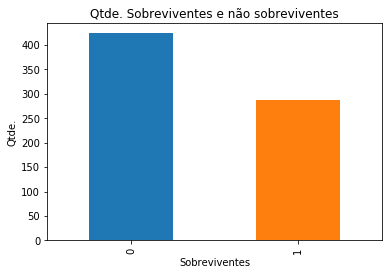

In [33]:
#Histograma sobreviventes
ax = df_titanic['survived'].value_counts().plot(kind='bar', title='Qtde. Sobreviventes e não sobreviventes');
ax.set_xlabel("Sobreviventes");
ax.set_ylabel("Qtde.");

Valor 1 para sobreviventes e valor 0 para não sobreviventes. A quantidade de sobreviventes foi inferior a quantidade dos que não conseguiram sobreviver.

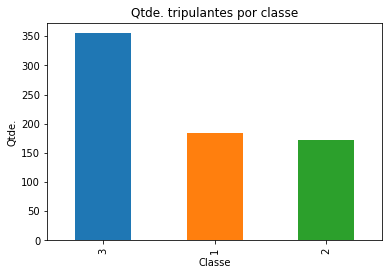

In [32]:
#Histograma Classes
ax = df_titanic['pclass'].value_counts().plot(kind='bar', title='Qtde. tripulantes por classe');
ax.set_xlabel("Classe");
ax.set_ylabel("Qtde.");

A maior concentração de tripulantes enta na 3 classe, com mais ou menos 350 pessoas, em sguida a primeira classe com mais ou menos 200 pessoas e por ultimo a segunda classe com umas 180 pessoas.

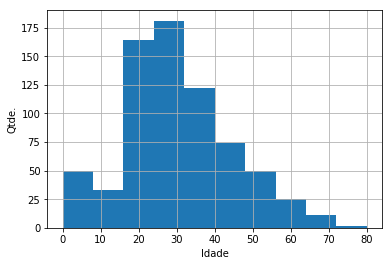

In [38]:
#Histograma idades
ax = df_titanic['age'].hist();
ax.set_xlabel("Idade");
ax.set_ylabel("Qtde.");

Histograma acima mostra o conjunto de dados com a variavel deslocada para direita.

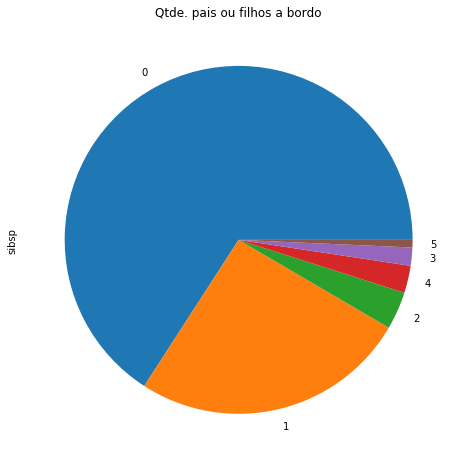

In [39]:
#Histograma familiar
ax = df_titanic['sibsp'].value_counts().plot(kind='pie', figsize=(8,8), title='Qtde. pais ou filhos a bordo');

O grafico de pizza mostra qua a quantidade de pessoas com nenhum pai ou filho a bordo é muito melhor do que a quantidade de 1 ou mais filhos a bordo do navio.

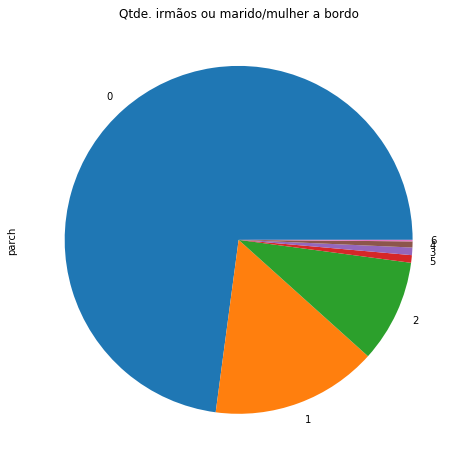

In [40]:
#Histograma familiar
df_titanic['parch'].value_counts().plot(kind='pie', figsize=(8,8), title='Qtde. irmãos ou marido/mulher a bordo');

O grafico mostra que tambem a quantidade de pessoas que não tinham irmaos ou marido/mulher a bordo é maior do que das pessoas que possuiam pelo menos 1 a bordo.

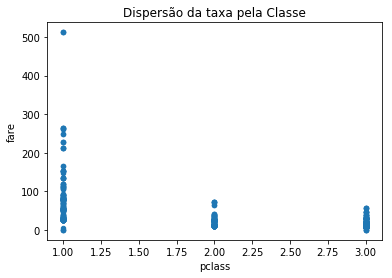

In [41]:
#Dispersão taxa pela classe
df_titanic.plot(x='pclass', y='fare', kind='scatter', title='Dispersão da taxa pela Classe');

Os valores das taxas para a primeira classe estão mais dispersos. Ou seja variaram mais o valor do que nas outras classes.

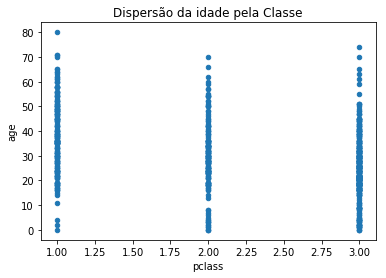

In [42]:
#Dispersão idade pela classe
df_titanic.plot(x='pclass', y='age', kind='scatter', title='Dispersão da idade pela Classe');

Dispersão da primeira classe tem uma quantidade maoir para idades mais elevadas. Mesmo com a diferença sendo pequena é possivel observar que a primera classe tem idades mais elevadas.

# Quarto e Quinto Passo
Tirando conclusões dos dados.
Comunicando os resultados.

Depois de encontrada as relações entre as variáveis, pode-se tirar as conclusões sobre as perguntas abordadas e comunicar os resultados através de gráficos.

## Conclusão sobre a primeira pergunta

In [46]:
#Criação de um dataframe auxiliar somente com sobreviventes
survived = df_titanic.query('survived == 1')

In [71]:
print("Sobreviveram {} crianças a bordo".format(survived.query("age_levels == 'Crianca'")['age_levels'].count()))
print("Sobreviveram {} adultos a bordo".format(survived.query("age_levels == 'Adulto'")['age_levels'].count()))
print("Sobreviveram {} idosos a bordo".format(survived.query("age_levels == 'Idoso'")['age_levels'].count()))

Sobreviveram 70 crianças a bordo
Sobreviveram 214 adultos a bordo
Sobreviveram 4 idosos a bordo


É possível observar que a maior quantidade de pessoas sobreviventes está na classe adulta, enquanto a menos esta entre os idosos.

In [76]:
#Verificação da porcentagem de cada classe de idade sobrevivente
total_criancas = df_titanic.query("age_levels == 'Crianca'").shape[0]
total_adultos = df_titanic.query("age_levels == 'Adulto'").shape[0]
total_idosos = df_titanic.query("age_levels == 'Idoso'").shape[0]

print("Sobreviveram {0:.2f}% das crianças a bordo".format(survived.query("age_levels == 'Crianca'")['age_levels'].count()/total_criancas*100))
print("Sobreviveram {0:.2f}% dos adultos a bordo".format(survived.query("age_levels == 'Adulto'")['age_levels'].count()/total_adultos*100))
print("Sobreviveram {0:.2f}% dos idosos a bordo".format(survived.query("age_levels == 'Idoso'")['age_levels'].count()/total_idosos*100))

Sobreviveram 50.36% das crianças a bordo
Sobreviveram 38.77% dos adultos a bordo
Sobreviveram 19.05% dos idosos a bordo


Apesar da quantidade de sobreviventes ser maior entre os adultos, a porcentagem de crianças que estavam a bordo e sobreviveram é a maior entre as três. Podendo chegar a conclusão de que tentaram salvar a maioria das crianças, e os adultos por serem mais ageis foram os que mais conseguiram sobreviver. Já os idosos não tiveram muitos sobreviventes, e somente 22% conseguiram sobreviver, isso provalvelmente por não conseguirem abandonar o navío que estava naufragando.

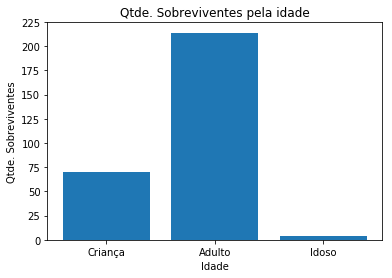

In [82]:
#Grafico da quantidade de sobreviventes pela idade
locations = [1, 2, 3]
heights = [survived.query("age_levels == 'Crianca'")['age_levels'].count(), survived.query("age_levels == 'Adulto'")['age_levels'].count(), survived.query("age_levels == 'Idoso'")['age_levels'].count()]
labels = ['Criança', 'Adulto', 'Idoso']
plt.bar(locations, heights, tick_label=labels)
plt.title('Qtde. Sobreviventes pela idade')
plt.xlabel('Idade')
plt.ylabel('Qtde. Sobreviventes');

A quantidade de sobreviventes dos tripulantes classificados como adultos é bem maior do que os demais. Os idosos foram a classificação que teve menos sobreviventes.

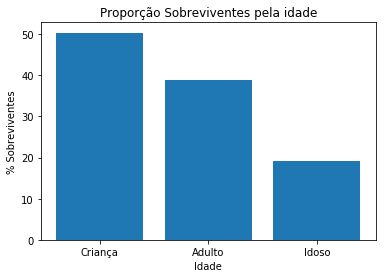

In [84]:
#Grafico proporção de sobreviventes pela idade
locations = [1, 2, 3]
heights = [survived.query("age_levels == 'Crianca'")['age_levels'].count()/total_criancas*100, survived.query("age_levels == 'Adulto'")['age_levels'].count()/total_adultos*100, survived.query("age_levels == 'Idoso'")['age_levels'].count()/total_idosos*100]
labels = ['Criança', 'Adulto', 'Idoso']
plt.bar(locations, heights, tick_label=labels)
plt.title('Proporção Sobreviventes pela idade')
plt.xlabel('Idade')
plt.ylabel('% Sobreviventes');

Das classificações das idades das pessoas que estavam a bordo a maior taxa de sobrevivência foi entre as crianças, onde praticmente 50% sobreviveram, seguido dos adultos que tiveram uma taxa de sobrevivência perto dos 40% e por ultimo os idosos onde somente 20% sobreviveram.

In [101]:
female = df_titanic.query("sex == 'female'")
male = df_titanic.query("sex == 'male'")

print("Sobreviveram {} mulheres".format(female.query("survived == 1")['survived'].count()))
print("Sobreviveram {} homens".format(male.query("survived == 1")['survived'].count()))

Sobreviveram 195 mulheres
Sobreviveram 93 homens


Pelo calculo é possível observar que a quantidade de pessoas sobreviventes foram a maioria mulheres.

In [102]:
#Verificação da porcentagem de sobreviventes quanto ao sexo
total_female = female.shape[0]
total_male = male.shape[0]
print("Sobreviveram {0:.2f}% das mulheres".format(female.query("survived == 1")['survived'].count()/total_female*100))
print("Sobreviveram {0:.2f}% dos homens".format(male.query("survived == 1")['survived'].count()/total_male*100))

Sobreviveram 75.29% das mulheres
Sobreviveram 20.53% dos homens


A porcentagem de mulheres sobreviventes tambem é muito maior que a de homens, isso pode ser ao fato de terem dado a preferência para salvar as mulheres. Os homens provalvelmete ficaram auxiliando para que todos pudessem abandonar o navio.

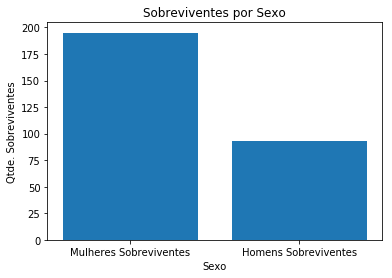

In [103]:
#Grafico da quantidade de sobreviventes por sexo
locations = [1, 2]
heights = [female.query("survived == 1")['survived'].count(), male.query("survived == 1")['survived'].count()]
labels = ['Mulheres Sobreviventes', 'Homens Sobreviventes']
plt.bar(locations, heights, tick_label=labels)
plt.title('Qtde. Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Qtde. Sobreviventes');

Separando os sobreviventes por sexo, as muheres foram as que mais conseguiram sobreviver, cerca de 200 mulheres sobreviveram, ja os homens somente perto dos 100 tripulantes sobreviveram.

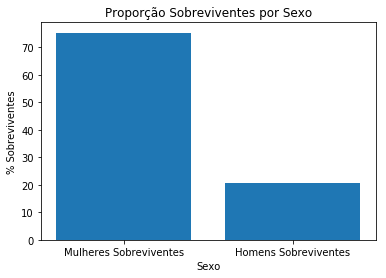

In [106]:
#Grafico proporção de sobreviventes por sexo
female = df_titanic.query("sex == 'female'")
male = df_titanic.query("sex == 'male'")
locations = [1, 2]
heights = [female.query("survived == 1")['survived'].count()/female.shape[0]*100, male.query("survived == 1")['survived'].count()/male.shape[0]*100]
labels = ['Mulheres Sobreviventes', 'Homens Sobreviventes']
plt.bar(locations, heights, tick_label=labels)
plt.title('Proporção Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('% Sobreviventes');

Das mulheres a bordo mais de 70% conseguiram sobreviver, essa taxa já é bem baixa para os homens onde somente perto dos 20% sobreviveram.

In [107]:
print("Sobreviveram {} da primeira classe".format(survived.query("pclass == 1")['pclass'].count()))
print("Sobreviveram {} da segunda classe".format(survived.query("pclass == 2")['pclass'].count()))
print("Sobreviveram {} da terceira classe".format(survived.query("pclass == 3")['pclass'].count()))

Sobreviveram 120 da primeira classe
Sobreviveram 83 da segunda classe
Sobreviveram 85 da terceira classe


Apesar de bem distribuida, a primeira classe foi a que teve mais sobreviventes.

In [109]:
#Verificação da porcentagem de sobreviventes quanto a classe
total_1classe = df_titanic.query("pclass == 1").shape[0]
total_2classe = df_titanic.query("pclass == 2").shape[0]
total_3classe = df_titanic.query("pclass == 3").shape[0]

print("Sobreviveram {0:.2f}% da primeira classe".format(survived.query("pclass == 1")['pclass'].count()/total_1classe*100))
print("Sobreviveram {0:.2f}% da segunda classe".format(survived.query("pclass == 2")['pclass'].count()/total_2classe*100))
print("Sobreviveram {0:.2f}% da terceira classe".format(survived.query("pclass == 3")['pclass'].count()/total_3classe*100))

Sobreviveram 65.22% da primeira classe
Sobreviveram 47.98% da segunda classe
Sobreviveram 23.94% da terceira classe


Apesar da porcentagem de sobrevivência da primeira classe ter sido mais elevado que as outras duas classes, a quantidade de sobreviventes de cada classe mostra que o fator da classe das pessoas estavam no navio não afetou o fator sobervivência.

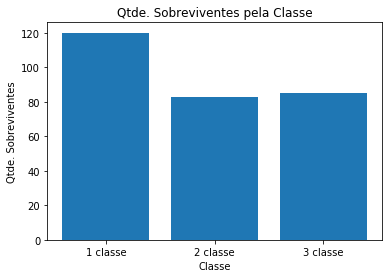

In [113]:
#Grafico da quantidade de sobreviventes quanto a classe
locations = [1, 2, 3]
heights = [survived.query("pclass == 1")['pclass'].count(), survived.query("pclass == 2")['pclass'].count(), survived.query("pclass == 3")['pclass'].count()]
labels = ['1 classe', '2 classe', '3 classe']
plt.bar(locations, heights, tick_label=labels)
plt.title('Qtde. Sobreviventes pela Classe')
plt.xlabel('Classe')
plt.ylabel('Qtde. Sobreviventes');

Dos sobreviventes a maioria pertencia a primeira classe, cerca de 120 sobreviventes eram da primeira classe, seguido da terceira classe que sobrevivem um pouco mais de 80 pessoas e a segunda classe onde sobreviveram um pouco menos de 80 pessoas.

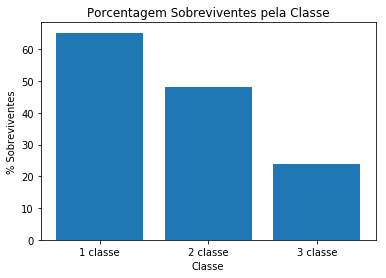

In [114]:
#Grafico da quantidade de sobreviventes quanto a classe
locations = [1, 2, 3]
heights = [survived.query("pclass == 1")['pclass'].count()/total_1classe*100, survived.query("pclass == 2")['pclass'].count()/total_2classe*100, survived.query("pclass == 3")['pclass'].count()/total_3classe*100]
labels = ['1 classe', '2 classe', '3 classe']
plt.bar(locations, heights, tick_label=labels)
plt.title('Porcentagem Sobreviventes pela Classe')
plt.xlabel('Classe')
plt.ylabel('% Sobreviventes');

Dos tripulantes que estavam na primeira classe, sobreviveram 70%, ja os que estavam na segunda classe sobreviveram um pouco menos de 50% e na terceira classe a tax de sobrevivência ficou entre os 20% e 30%.

## Conclusão sobre a segunda pergunta.

In [115]:
pclass = df_titanic['pclass'].unique()
for pcl in pclass:
    print('Classe: {0}, Idade Média: {1}'.format(
                pcl, df_titanic.query("pclass == @pcl")['age'].mean()))

Classe: 3, Idade Média: 25.11549295774648
Classe: 1, Idade Média: 38.09782608695652
Classe: 2, Idade Média: 29.85549132947977


A idade média de cada classe mostra um aumento da idade na medida que sobe a classe, portanto quanto mais idade as pessoas tem elas tendem a escolher uma classe mais alta. Isso pode muito ser devido a questão financeira ou até mesmo o conforto.

O gráfico acima mostra a taxa média por local de embarque.

In [ ]:
embarked = df_titanic['embarked'].unique()

def status_classe(cl):
    """
      Função para mostrar o status de uma classe passada pelo usuário dataframe df_titanic.
      Argumentos:
          cl: valor inteiro da classe.
      Retorna:
          Uma texto indicando quantidade, porcentagem e taxa média da classe embarcada em cada local de embarque.

      """
    for em in embarked:
        total = df_titanic.shape[0]
        print('Embarcou em: {0}, Classe: {1}, Qtde. embarcados: {2}, Porcentagem embarcados: {3:.3f}, Taxa Média: {4}'.format(
                em, cl, df_titanic.query("embarked == @em and pclass == @cl")['pclass'].count(), df_titanic.query("embarked == @em and pclass == @cl")['pclass'].count()/total, df_titanic.query("embarked == @em and pclass == @cl")['fare'].mean()))
    print("\n")

In [123]:
pclass = df_titanic['pclass'].unique()
for pcl in pclass:
    status_classe(pcl)

Embarcou em: S, Classe: 3, Qtde. embarcados: 290, Porcentagem embarcados: 0.407, Taxa Média: 13.529451034482758
Embarcou em: C, Classe: 3, Qtde. embarcados: 41, Porcentagem embarcados: 0.058, Taxa Média: 11.369926829268293
Embarcou em: Q, Classe: 3, Qtde. embarcados: 24, Porcentagem embarcados: 0.034, Taxa Média: 12.780904166666668


Embarcou em: S, Classe: 1, Qtde. embarcados: 108, Porcentagem embarcados: 0.152, Taxa Média: 74.1724148148148
Embarcou em: C, Classe: 1, Qtde. embarcados: 74, Porcentagem embarcados: 0.104, Taxa Média: 108.24639864864864
Embarcou em: Q, Classe: 1, Qtde. embarcados: 2, Porcentagem embarcados: 0.003, Taxa Média: 90.0


Embarcou em: S, Classe: 2, Qtde. embarcados: 156, Porcentagem embarcados: 0.219, Taxa Média: 21.075
Embarcou em: C, Classe: 2, Qtde. embarcados: 15, Porcentagem embarcados: 0.021, Taxa Média: 26.81194666666666
Embarcou em: Q, Classe: 2, Qtde. embarcados: 2, Porcentagem embarcados: 0.003, Taxa Média: 12.35




Provavelmente o local de embarque inicial era em S, pois foi onde embarcou mais gente. A maior quantidade de embarque na primeira classe tambem foi em S, onde a taxa era a mais baixa das 3 localidades de embarque.
Observando a proporção de primeira classe pelo local de embarque, a maior das 3 localidades foi a C, onde metade das pessoas que embarcaram foram para a primeira classe, isso pode-se dar pela qualidade de vida da cidade que pode ser melhor em C do que nas outras duas localidades.

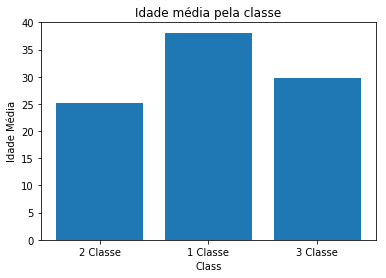

In [128]:
#Grafico com a média de idade de cada classe
pclass = df_titanic['pclass'].unique()
pclass_list = []
for pcl in pclass:
    pclass_list.append(df_titanic.query("pclass == @pcl")['age'].mean())

locations = [1, 2, 3]
heights = [pclass_list[0], pclass_list[1], pclass_list[2]]
labels = ['2 Classe', '1 Classe', '3 Classe']
plt.bar(locations, heights, tick_label=labels)
plt.title('Idade média pela classe')
plt.xlabel('Class')
plt.ylabel('Idade Média');

A idade média da primeira classe foi a mais elevada, entre 35 e 40 anos, para a terceira classe a idade média esta entre os 30 anos e para a segunda classe ficou entre os 25 anos.

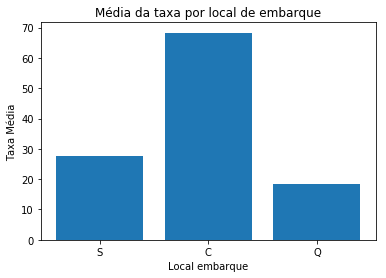

In [129]:
#Gráfico da taxa média por local de embarque
embarked = df_titanic['embarked'].unique()
embarked_list = []
for em in embarked:
    embarked_list.append(df_titanic.query("embarked == @em")['fare'].mean())

locations = [1, 2, 3]
heights = [embarked_list[0], embarked_list[1], embarked_list[2]]
labels = ['S', 'C', 'Q']
plt.bar(locations, heights, tick_label=labels)
plt.title('Média da taxa por local de embarque')
plt.xlabel('Local embarque')
plt.ylabel('Taxa Média');

As pessoas que enbarcaram em C obtiveram uma taxa de embarque muito mais elevado que as outras localidades, a taxa ficou entre os 70, ja em S a taxa estava entre os 30 e em Q entre os 20.

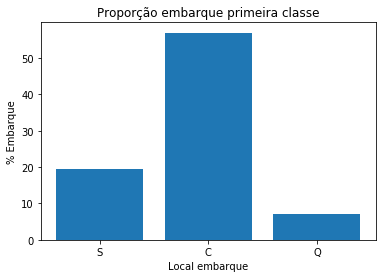

In [43]:
#Gráfico da proporção por local de embarque
embarked = df_titanic['embarked'].unique()
embarked_list = []
for em in embarked:
    embarked_list.append(df_titanic.query("embarked == @em and pclass ==1")['pclass'].count()/df_titanic.query("embarked == @em").shape[0]*100)

locations = [1, 2, 3]
heights = [embarked_list[0], embarked_list[1], embarked_list[2]]
labels = ['S', 'C', 'Q']
plt.bar(locations, heights, tick_label=labels)
plt.title('Proporção embarque primeira classe')
plt.xlabel('Local embarque')
plt.ylabel('% Embarque');

O grafico comunica que dentre os tripulantes da primeira classe, a maior taxa de embarque foi em C que estava com mais de 50% dos embarcados, seguido de S com 20% dos embarcados e por ultimo em Q que possuia cerca de 10% dos embarcados.

## Connclusões sobre a terceira pergunta.

In [47]:
total_survived = survived.shape[0]
print("Sobreviveram {:.2f}% da pessoas com pais ou filhos".format(survived.query("parch > 0")['parch'].count()/total_survived*100))
print("Sobreviveram {:.2f}% da pessoas sem relativos pais ou filhos".format(survived.query("parch == 0")['parch'].count()/total_survived*100))

Sobreviveram 36.11% da pessoas com pais ou filhos
Sobreviveram 63.89% da pessoas sem relativos pais ou filhos


Pelos calculos a maior taxa de sobreviventes foram as pessoas que não estavam nem com os pais ou os filhos a bordo. Pode-se concluir que os passageiros que estavam com filhos ou pais se mantiveram unidos e nem todos conseguiram abandonar o navio para sobreviver.

In [136]:
total_survived = survived.shape[0]
print("Sobreviveram {:.2f}% da pessoas com irmãos ou marido/mulher".format(survived.query("sibsp > 0")['parch'].count()/total_survived*100))
print("Sobreviveram {:.2f}% da pessoas sem irmãos ou marido/mulher".format(survived.query("sibsp == 0")['parch'].count()/total_survived*100))

Sobreviveram 39.93% da pessoas com irmãos ou marido/mulher
Sobreviveram 60.07% da pessoas sem irmãos ou marido/mulher


O mesmo ocorre para passageiros que estavam com esposas/maridos e irmão a bordo, a taxa de sobrevivência foi maior para quem não estava a bordo com esses familiares. Pode-se concluir que o mesmo motivo anterior levou a tirar essas conclusões.

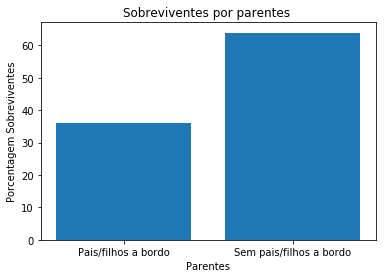

In [49]:
locations = [1, 2]
total_survived = survived.shape[0]
heights = [survived.query("parch > 0")['parch'].count()/total_survived*100, survived.query("parch == 0")['parch'].count()/total_survived*100]
labels = ['Pais/filhos a bordo', 'Sem pais/filhos a bordo']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes por parentes ')
plt.xlabel('Parentes')
plt.ylabel('Porcentagem Sobreviventes');

Dos sobreviventes cerca de 60% não possuiam pais ou filhos a bordo e cerca de 40% estavam com pais ou filhos a bordo.

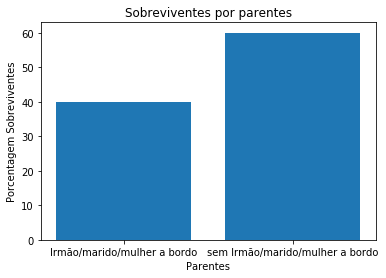

In [50]:
locations = [1, 2]
total_survived = survived.shape[0]
heights = [survived.query("sibsp > 0")['parch'].count()/total_survived*100, survived.query("sibsp == 0")['parch'].count()/total_survived*100]
labels = ['Irmão/marido/mulher a bordo', 'sem Irmão/marido/mulher a bordo']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes por parentes')
plt.xlabel('Parentes')
plt.ylabel('Porcentagem Sobreviventes');

Dos sobreviventes cerca de 60% estavam sem irmaos ou marido/mulher a bordo enquanto cerca de 40% estava com irmãos ou marido/mulher a bordo.

# Conclusão

Baseado na análise de dados do titanic podemos chegar a tais conclusões:

Foi priorizado salvar as crianças que estavam a bordo, das crianças que estava no navio 50,36% sobreviveram, ja os adultos 38,77% sobreviveram e os idosos somente 19,05% sobreviveram.

As mulheres tambem tiveram preferência para sair do navio, das mulheres que estavam a bordo 75,29% sobreviveram, enquanto dos homens a bordo somente 20,53% sobreviveram.

Dos sobreviventes a porcentagem de sobrevivênvia tambem é maior na primeira classe, foram 65,22% que sobreviveram da primeira classe, 47,98% da segunda classe e somente 23,94% da terceira classe.

Tambem foi observado que a media de idade da primeira classe é mais elevada, concluindo que isso é um dos fatores que levaram as pessoas a comprar a primeira classe. A média de idade da primeira classe é de 38 anos, da segunda classe de 29 anos e terceira classe de 25 anos.

Outro fator que pode ter levado as pessoas a comprarem a primeira classe foi a taxa do bilhete, a maior quantidade de bilhetes comprados de primeira classe foi onde a taxa era a mais baixa, no caso em S com uma taxa média de 74,17.

Outro topico observado foi se o fator de ter familiares a bordo levou as pessoas a não abandonarem o navio, das pessoas que estavam com pais ou filhos a bordo foram 36% que sobreviveram e das pessoas que estavam com irmãos ou marido/mulher a bordo foram 39% que sobreviveram. Como a taxa de sobrevivência foi baixo o fato de ter familia a bordo pode ter feito com que os pessoas não abandonassem o navio.

# Limitações

Para a análise dos dados foi encontrada uma limitação por não possuir a idade de alguns passageiros. Essa caracteristica é:

    -Medida tomada:
    
        -Age: substituido os valores nulos pela média de idade da propria coluna age de todas as amostras presentes no dataframe.
        
    - Depois os dados da idade foram modificados para valores inteiros para facilitar a análise.    